In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def rectangular_wave(t: np.ndarray,
                     height: float = 1.0,
                     width: float = 1.0,
                     duty: float = 0.5,
                     phase: float = 0.0) -> np.ndarray:
    """
    Generate a rectangular (pulse) wave.

    Parameters
    ----------
    t : np.ndarray
        1D array of time points.
    height : float, optional
        Amplitude of the pulse. Default is 1.0.
    width : float, optional
        Period of the rectangular wave. Default is 1.0.
    duty : float, optional
        Duty cycle (0 < duty < 1). Default is 0.5.
    phase : float, optional
        Time shift applied to the wave. Positive shifts to the right. Default is 0.0.

    Returns
    -------
    np.ndarray
        Array of same shape as `t`, containing values 0 or `height`.
    """
    # Apply phase shift to time axis
    t_shifted = t + phase
    # Compute position within each period
    phase_in_cycle = np.mod(t_shifted, width)
    # Determine where the wave is high (True) vs. low (False)
    mask = phase_in_cycle < (duty * width)
    # Convert boolean mask to float amplitude
    return mask.astype(float) * height

Text(0, 0.5, 'Amplitude')

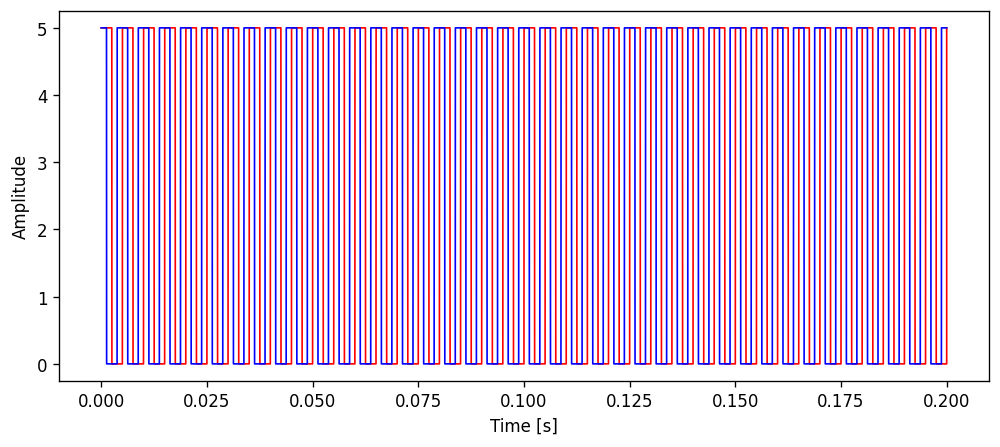

In [28]:
import numpy as np

t = np.linspace(0, 0.2, 200000)  
dA = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.0)
dB = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.00125)

fig, ax = plt.subplots(figsize=(10, 4), dpi=120)
ax.plot(t, dA, lw=1.0, color='red')
ax.plot(t, dB, lw=1.0, color='blue')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

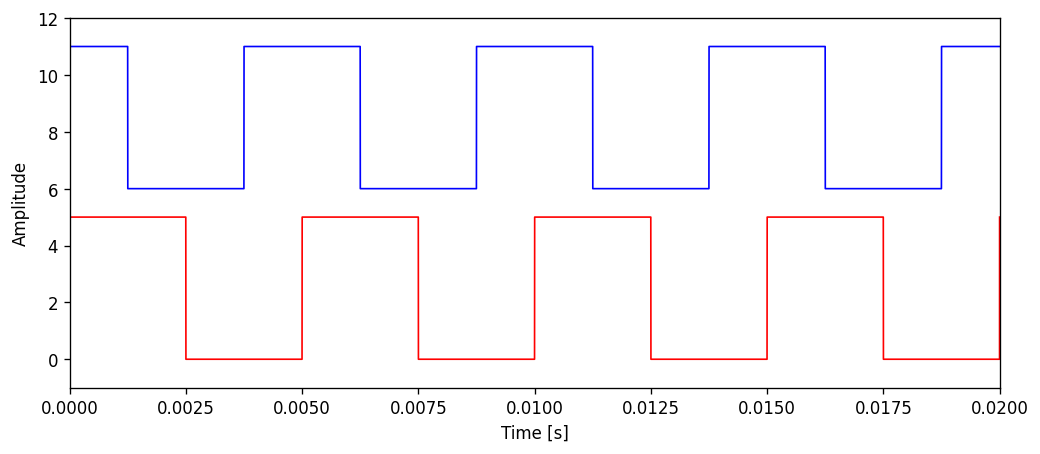

In [34]:
t = np.linspace(0, 0.2, 200000)   # 0 から 5 秒、1000 サンプル
dA = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.0)
dB = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.00125)

fig, ax = plt.subplots(figsize=(10, 4), dpi=120)
ax.plot(t, dA, lw=1.0, color='red')
ax.plot(t, dB+6, lw=1.0, color='blue')
ax.set_xlim(0, 0.02)
ax.set_ylim(-1, 12)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

In [35]:
def quad_freq_from_two(dA: np.ndarray, dB: np.ndarray, height: float = 1.0) -> np.ndarray:
    """
    Create a 4x frequency rectangular wave by XOR of two phase-shifted waves.

    Parameters
    ----------
    dA : np.ndarray
        First pulse wave (values 0 or height).
    dB : np.ndarray
        Second pulse wave (values 0 or height).
    height : float, optional
        Desired output amplitude. Default is 1.0.

    Returns
    -------
    np.ndarray
        4x frequency pulse wave (0 or height).
    """
    # Perform logical XOR on the two input waves
    return ((dA > 0) ^ (dB > 0)).astype(float) * height

Text(0, 0.5, 'Amplitude')

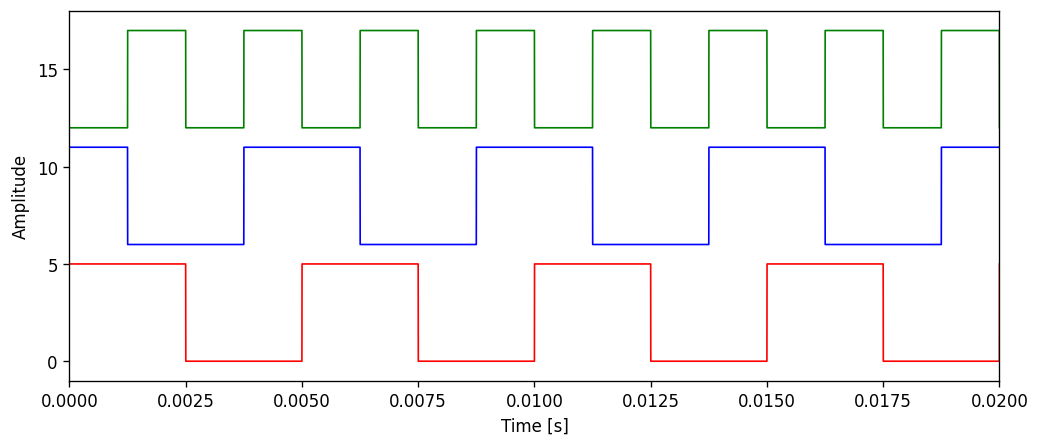

In [40]:
dA = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.0)
dB = rectangular_wave(t, height=5, width=0.005, duty=0.50, phase=0.00125)


# Create a 4x frequency rectangular wave using the two input waves
quad = quad_freq_from_two(dA, dB, height=5)

fig, ax = plt.subplots(figsize=(10, 4), dpi=120)
ax.plot(t, dA, lw=1.0, color='red')
ax.plot(t, dB+6, lw=1.0, color='blue')
ax.plot(t, quad+12, lw=1.0, color='green')
ax.set_xlim(0, 0.02)
ax.set_ylim(-1, 18)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')